
## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [140]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [141]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [142]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature Engineering
### 4 수치형 변수를 범주형 변수로 만들기

In [143]:
df["Pregnancies_high"] = df["Pregnancies"] > 6 # 6이상이면 True, 아닐경우
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [144]:
# One-hot-encoding: 하나의 컬럼을 구간마다 나눠서 만들어 주는 방법
# 수치 => 범주 => 수치
df["Age_low"]=df["Age"]<25
df["Age_middle"]=(df["Age"]>=25) & (df["Age"]<=60)
df["Age_high"]=df["Age"]>60
df[["Age","Age_low","Age_middle","Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_low', ylabel='count'>

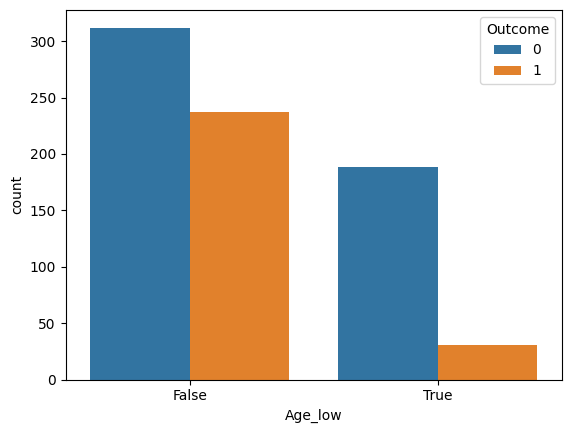

In [145]:
sns.countplot(data=df,x="Age_low",hue="Outcome")

<Axes: xlabel='Age_middle', ylabel='count'>

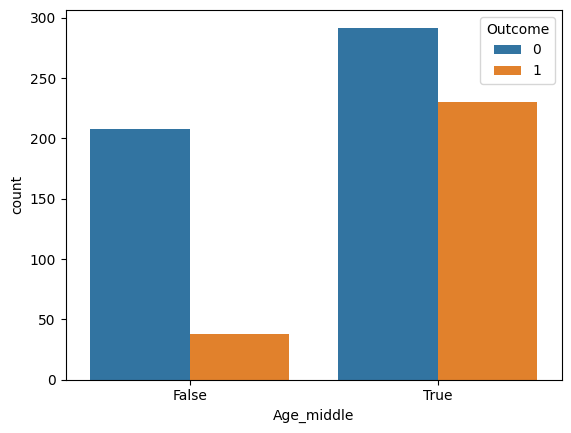

In [146]:
sns.countplot(data=df,x="Age_middle",hue="Outcome")

<Axes: xlabel='Age_high', ylabel='count'>

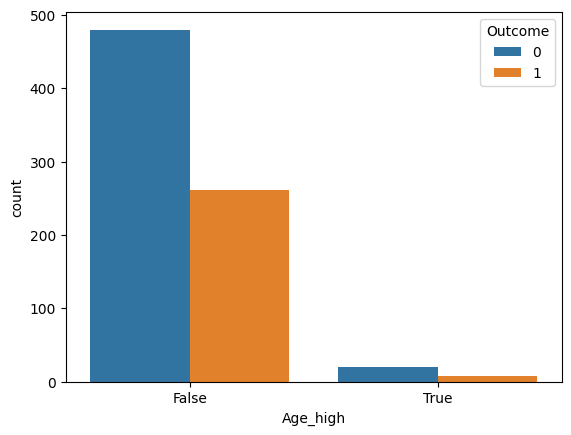

In [147]:
sns.countplot(data=df,x="Age_high",hue="Outcome")

## 결측치 다루기

In [176]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [177]:
# Pregnancies ~ Insulin까지 min값이 0으로 나옴 -> 결측치가 있을 것으로 예상됨.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [178]:
df["Insulin"]

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

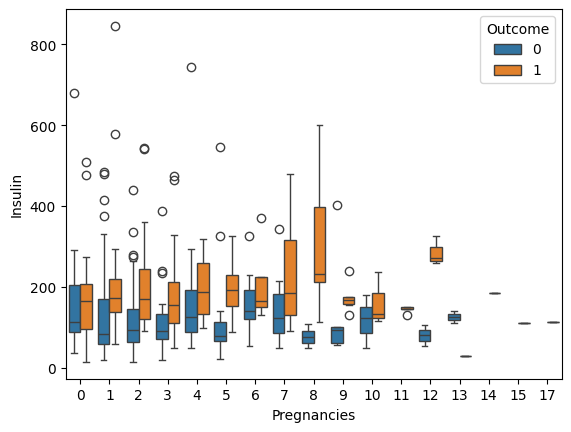

In [180]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화 합니다.
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그립니다.
sns.boxplot(data=df[df["Insulin"]>0],
            x="Pregnancies",y="Insulin",hue="Outcome")

## violinplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

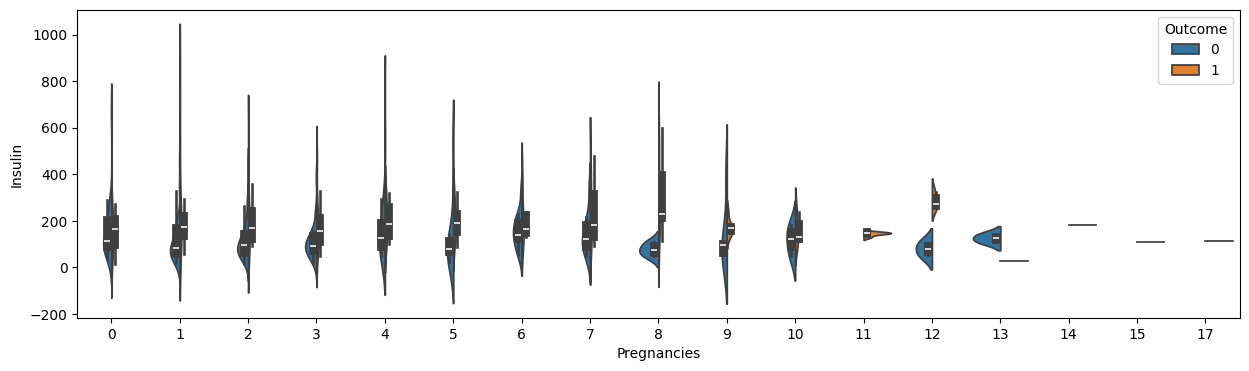

In [181]:
# 위의 그래프를 violinplot으로 시각화 합니다.
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df["Insulin"]>0],
               x="Pregnancies",y="Insulin",hue="Outcome",split=True)

In [297]:
df["Insulin_nan"]=df["Insulin"].replace(0,np.nan)

In [298]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,NaN
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,NaN
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,NaN
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0


In [299]:
df[["Insulin","Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [300]:
df["Insulin_nan"].isnull().sum()

374

In [301]:
# 결측치 비율
df["Insulin_nan"].isnull().mean()*100

48.69791666666667

In [302]:
df.groupby(["Outcome"])["Insulin","Insulin_nan"].agg(["mean","median"])

<ipython-input-302-a376d5c56528>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin","Insulin_nan"].agg(["mean","median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [305]:
# 결측치 채우기
df.loc[(df["Outcome"]==1) & (df["Insulin_nan"].isnull()),"Insulin_nan"] = 169.5 # nan-> Insulin_nan의 mean값으로 대체 -> median
df.loc[(df["Outcome"]==1) & (df["Insulin_nan"].isnull()),"Insulin_nan"]

Series([], Name: Insulin_nan, dtype: float64)

In [306]:
df.loc[(df["Outcome"]==0) & (df["Insulin_nan"].isnull()),"Insulin_nan"]=102.5 # nan-> mean -> median
df.loc[(df["Outcome"]==0) & (df["Insulin_nan"].isnull()),"Insulin_nan"]

Series([], Name: Insulin_nan, dtype: float64)

## 왜도, 첨도
- 왜도: 치우친 정도
- 첨도: 뾰족한 정도

<ipython-input-329-67b54882ed27>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])


<Axes: xlabel='Insulin', ylabel='Density'>

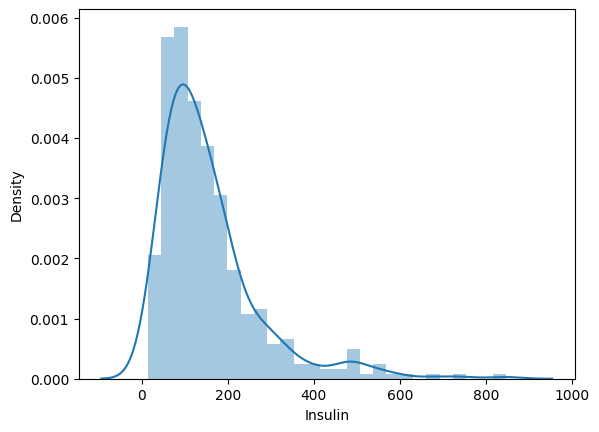

In [329]:
sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])

<ipython-input-333-a363f23614d8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1)) # 보통 log를 취할 때 +1을 해준다


<Axes: xlabel='Insulin', ylabel='Density'>

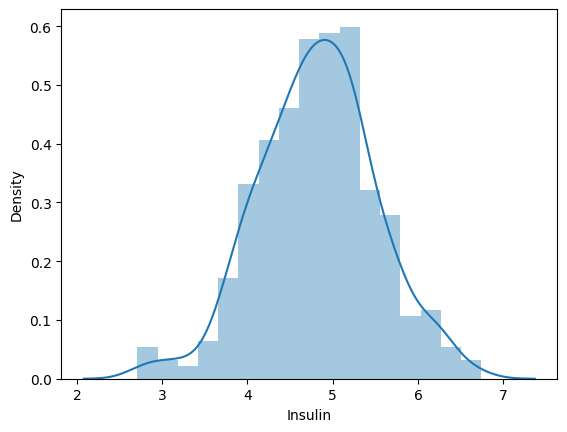

In [333]:
sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1)) # 보통 log를 취할 때 +1을 해준다
## -> log를 취하니 정규분포와 비슷한 형태를 보임

<ipython-input-335-1a25c53d9892>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin_nan"])


<Axes: xlabel='Insulin_nan', ylabel='Density'>

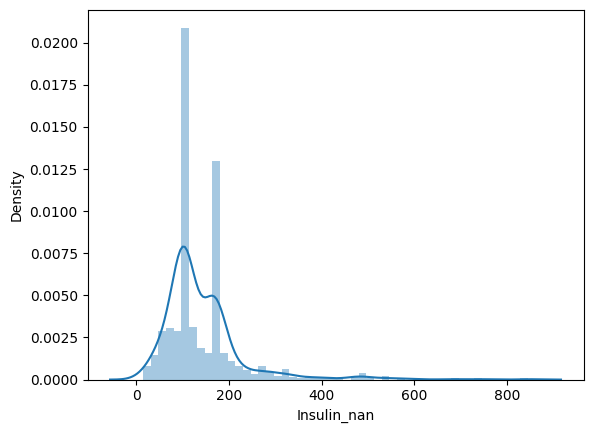

In [335]:
sns.distplot(df["Insulin_nan"])

In [338]:
df["Insulin_log"]=np.log(df["Insulin_nan"] + 1)

<ipython-input-339-69cbc48c5ad2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin_log"])


<Axes: xlabel='Insulin_log', ylabel='Density'>

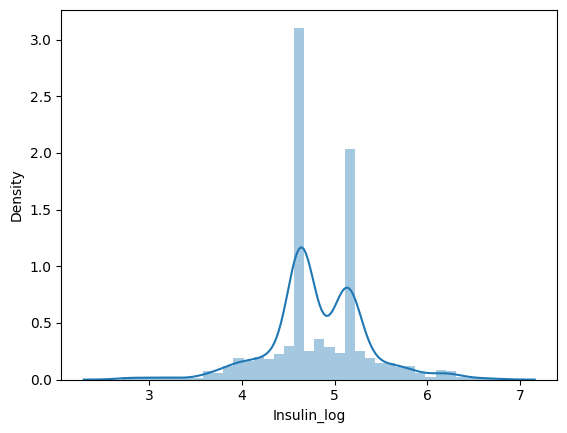

In [339]:
sns.distplot(df["Insulin_log"])

## 학습, 예측 데이터셋 나누기

In [341]:
# 8:2의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count라는 변수에 담습니다.
split_count=int(df.shape[0]*0.8)
split_count

614

In [342]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train=df[:split_count].copy()
train.shape

(614, 15)

In [343]:
test=df[split_count:].copy()
test.shape

(154, 15)

## 학습, 예측에 사용할 컬럼

In [344]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
# 이 부분을 통해 필요없는 feature 제거하면서 학습하기
feature_names=train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_nan")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_log']

## 정답이자 예측해야 될 값

In [345]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name="Outcome"
label_name # 정답

'Outcome'

## 학습, 예측 데이터셋 만들기

In [346]:
# 학습 세트 만들기 예) 시험의 기출문제
X_train=train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_log
0,148,72,35,33.6,0.627,50,False,5.135798
1,85,66,29,26.6,0.351,31,False,4.634729
2,183,64,0,23.3,0.672,32,True,5.135798
3,89,66,23,28.1,0.167,21,False,4.553877
4,137,40,35,43.1,2.288,33,False,5.129899


In [347]:
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [348]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test=test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_log
614,138,74,26,36.1,0.557,50,True,4.976734
615,106,72,0,25.8,0.207,27,False,4.634729
616,117,96,0,28.7,0.157,30,False,4.634729
617,68,62,13,20.1,0.257,23,False,2.772589
618,112,82,24,28.2,1.282,50,True,5.135798


In [349]:
y_test=test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 머신러닝 알고리즘 가져오기

In [350]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

## 학습(훈련)
- 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [351]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

## 예측
- 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [352]:
y_predict=model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

## 트리 알고리즘 분석하기
- 의사결정나무를 시각화 합니다.

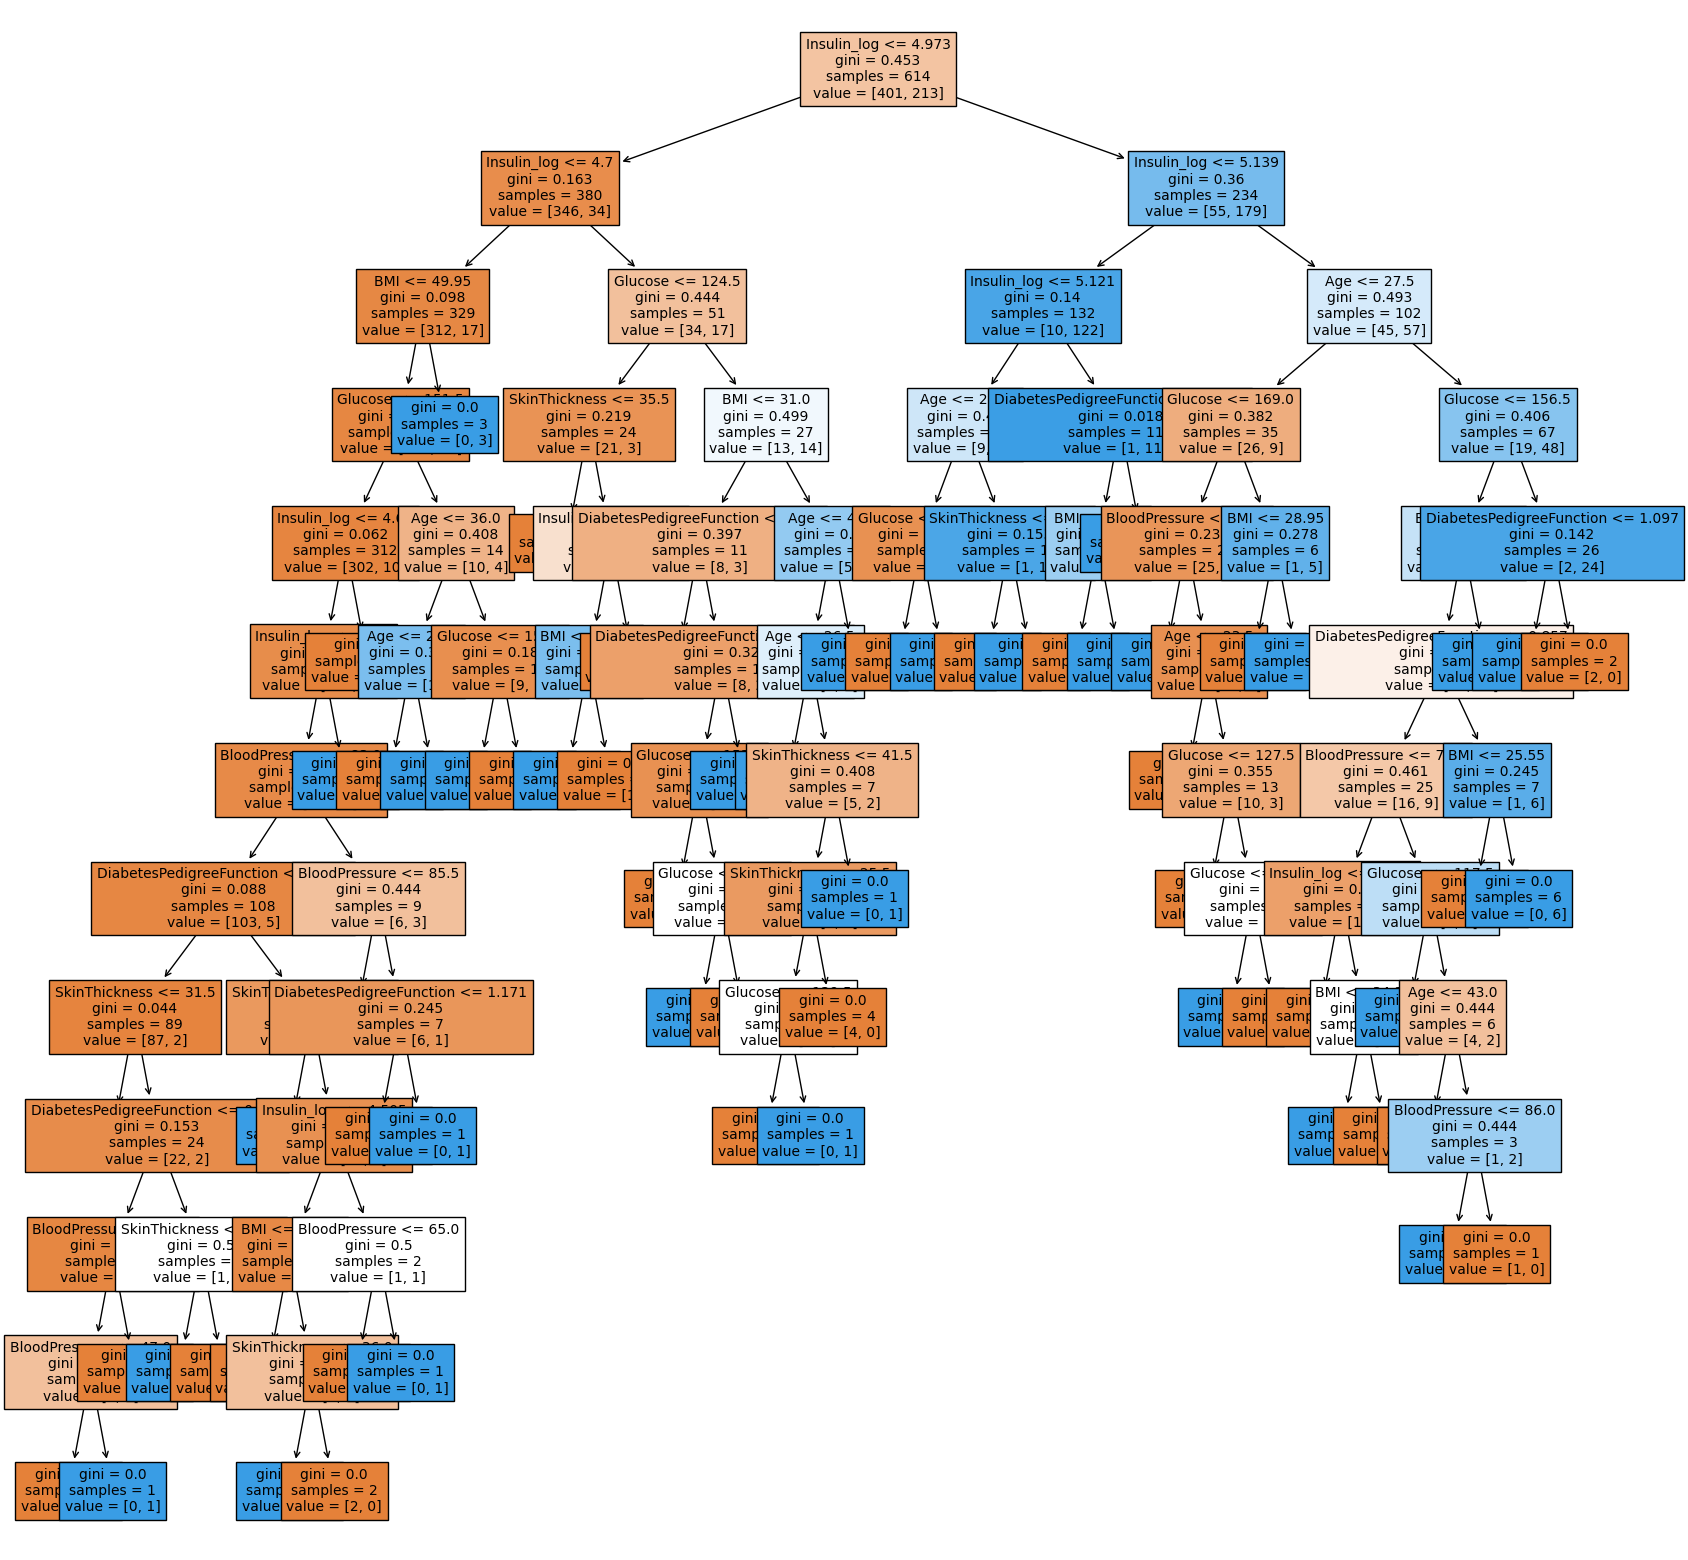

In [353]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
tree=plot_tree(model,feature_names=feature_names,filled=True,fontsize=10)

In [354]:
# graphviz를 통해 시각화 합니다.
# graphviz는 별도의 설치가 필요합니다.
# graphviz와 파이썬에서 graphviz를 사용할 수 있게 해주는 도구 2가지를 설치해 주셔야 합니다.
# import graphviz
# from sklearn.tree import export_graphviz
# dot_tree=export_graphviz(model,feature_names=feature_names,filled=True)
# graphviz.Source(dot_tree)

In [361]:
# 피처의 중요도를 추출하기

model.feature_importances_

array([0.09776889, 0.04081865, 0.0344541 , 0.07695165, 0.04556202,
       0.09481997, 0.        , 0.60962472])

<Axes: >

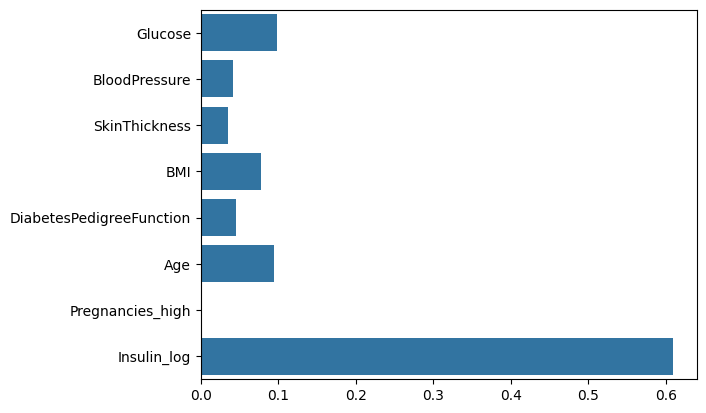

In [362]:
# 피처의 중요도 시각화하기
sns.barplot(x=model.feature_importances_,y=feature_names)

## 13 정확도(Accuracy) 측정하기

In [363]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
# 44 => 39 => 49 (나이 25세 기준)=> 55(나이 30세 기준) => 23(인슐린 결측치를 평균으로 대체) => 16(인슐린 결측치를 중앙값으로 대체)
diff_count= abs(y_test-y_predict).sum()
diff_count

16

In [364]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.
# 71 => 85(인슐린 결측치를 평균으로 대체) => 89(인슐린 결측치를 중앙값으로 대체)
(len(y_test)-diff_count)/len(y_test)*100

89.6103896103896

In [365]:
# 위에서 처럼 직접 구할 수 도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)*100

89.6103896103896

In [366]:
# model의 score로 점수를 계산합니다.
model.score(X_test,y_test)*100

89.6103896103896


- 결측치를 제거할 수도 있지만 결측치가 너무 많을 경우에는 채워주는 것이 좋다.
- 각 feature별로 data 분포도 확인시에 한쪽에 너무 data가 몰려 있으면 학습을 하기에 어려움이 있다. -> 전처리를 해줄 필요가 있음.